In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model #scikit-learn

In [8]:
df = pd.read_csv("homeprices.csv")
df # print the data or print(df)

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


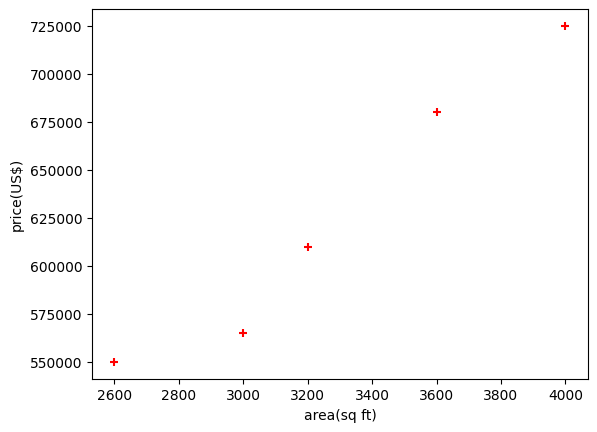

In [9]:
%matplotlib inline
plt.xlabel('area(sq ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color='red', marker='+')

In [10]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [11]:
# reg.predict([[3300]]) # predict price for 3300 sq ft
reg.predict(pd.DataFrame([[3300]], columns=['area'])) # feature name should be same as in df

array([628715.75342466])

In [12]:
reg.coef_ # slope

array([135.78767123])

In [13]:
reg.intercept_ # y-intercept

np.float64(180616.43835616432)

In [14]:
# y = m*x + b
135.78767123*3300 + 180616.43835616432

628715.7534151643

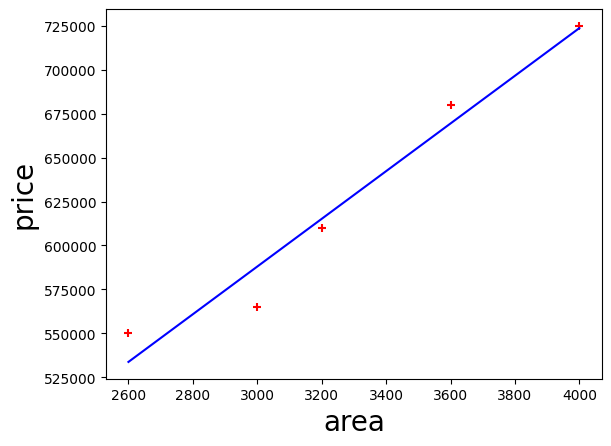

In [15]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')
# blue line shows predicted price

In [16]:
d = pd.read_csv("areas.csv")
d.head(3) # print first 3 rows

,area
0,1000
1,1500
2,2300


In [17]:
_price = reg.predict(d) # predict price for areas in d
_price

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [18]:
# d['prices'] # add a new column to d
d['prices'] = _price

In [19]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [20]:
# d.to_csv("prediction.csv") # save the data to a csv file
d.to_csv("prediction.csv", index=False) # without index column

In [23]:
# Save model to a file using pickle
import pickle 

In [24]:
with open('model_pickle', 'wb') as file:
    pickle.dump(reg, file)

In [25]:
# Load saved model
with open('model_pickle', 'rb') as file:
    model_p = pickle.load(file)

In [32]:
model_p.predict(pd.DataFrame([[3300]], columns=['area']))

array([628715.75342466])

In [33]:
model_p.intercept_

np.float64(180616.43835616432)

In [34]:
model_p.coef_

array([135.78767123])

In [38]:
# Save model using joblib
import joblib

In [39]:
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [40]:
# Load saved model
model_j = joblib.load('model_joblib')

In [41]:
model_j.predict(pd.DataFrame([[3300]], columns=['area']))

array([628715.75342466])

In [42]:
model_j.intercept_

np.float64(180616.43835616432)

In [43]:
model_j.coef_

array([135.78767123])